In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats

In [79]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab1/stud.csv"
df = pd.read_csv(url, sep=",")
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [81]:
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [97]:
df = df.replace(r'^\s$', np.nan, regex=True) # \s :matches white spaces
df['Age'] = df['Age'].replace(np.nan, 0, regex=True)
df['Age'] = df['Age'].astype(str).astype(int)

df['hrsStudy'] = df['hrsStudy'].replace(np.nan, 0, regex=True)
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)
#df['FinalGrade'] = df['FinalGrade'].astype(str).astype(int)

df.dropna(inplace = True) # dropping the rows with FinalGrade = NaN

# detecting outliers and removing them:
z_scores = stats.zscore(df['FinalGrade'])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3)
df['zscore'] = filtered_entries
df_no_outliers = df[df.zscore]
df = df_no_outliers
df.pop('zscore')
df.head()


,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


<AxesSubplot:>

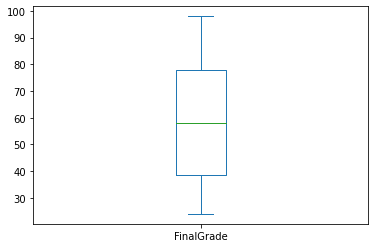

In [98]:
#ploting 1: 
#df['FinalGrade'].plot.box()
df['FinalGrade'].plot.box()

In [103]:
#Create Grade Column from A-F
grade = df['FinalGrade']
conditions = [( grade >= 91) & (grade <= 100),
             (grade >= 81) & (grade <= 90),
             (grade >= 71) & (grade <= 80),
             (grade >= 61) & (grade <= 70),
             (grade >= 51) & (grade <= 60),
             (grade <= 50)]
grades = ['A','B','C','D','E','F']
df['Grade'] = np.select(conditions, grades)
df.head()



,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


<AxesSubplot:xlabel='Grades'>

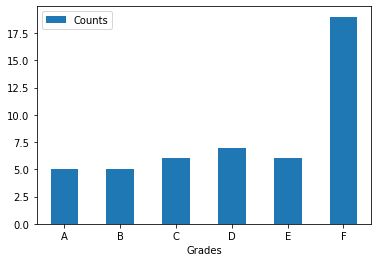

In [136]:
gr, counts = np.unique(df['Grade'], return_counts=True)

df_grades_counts = pd.DataFrame({"Grades": gr, "Counts": counts})

df_grades_counts.plot.bar(x="Grades", y="Counts", rot=0)
